# AIVLE스쿨 4기 DX트랙 5차 미니프로젝트 
## [미션#3] 중증질환 예측 모델링

[미션] 
 * Target : 중증질환 (뇌경색, 뇌출혈, 복부손상, 심근경색)
 * 데이터 분석 결과를 바탕으로 Target에 영향을 주는 Feature 전처리 (함수 정의)
 * 머신러닝/딥러닝 모델링 후 성능 비교
 * 최적AI 모델 선정 및 저장
 * 새로운 출동 이력에 제시된 환자의 증상을 바탕으로 중증 질환 예측 함수 정의

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 응급 출동 데이터 불러오기
# 파일명 : 119_emergency_dispatch.csv, encoding='cp949'
# 중증 질환이 ['심근경색', '복부손상', '뇌경색', '뇌출혈']인 데이터만 추출
# 데이터 랜덤으로 섞기

data = pd.read_csv("./119_emergency_dispatch.csv", encoding="cp949" )
desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])].copy()

# 데이터 랜덤으로 섞기

desease = desease.sample(frac=1).reset_index(drop=True)


### 1) 학습용, 평가용 데이터 준비하기

* 데이터 전처리 함수 가져오기

In [3]:
# 미션2에서 정의한 preprocessing 전처리 함수 정의 가져와서 실행하기

def preprocessing(desease):

    desease = desease.copy()

    desease['발열'] = [ 1 if x >=37 else 0 for x in desease['체온']]
    desease['고혈압'] = [ 1 if x >=140 else 0 for x in desease['수축기 혈압']]
    desease['저혈압'] = [ 1 if x <=90 else 0 for x in desease['수축기 혈압']]

    X = desease[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']]

    return X

In [3]:
def preprocessing2(desease):

    desease = desease.copy()

    desease['발열'] = [ 1 if x >=37 else 0 for x in desease['체온']]
    desease['고혈압'] = [ 1 if x >=140 else 0 for x in desease['수축기 혈압']]
    desease['저혈압'] = [ 1 if x <=90 else 0 for x in desease['수축기 혈압']]

    X = desease[['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐']]

    return X

In [4]:
# target 중증질환 값을 Y에 저장
# desease 데이터 프레임을 preprocessing 함수를 활용하여 데이터 전처리하여 필요한 feature만 X에 저장

Y = desease['중증질환']
X = preprocessing2(desease)

In [5]:
# AI 모델링을 위한 학습/검증 데이터 나누기 : train_test_split
# 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state = 2023
# 변수명 : train_x, test_x, train_y, test_y

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=2023)

### 2) 모델링

 * 활용 모델 : DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, DNN
 * 성능 평가 : accuracy_score

In [6]:
from sklearn.metrics import *

In [7]:
## Decision Tree
## 1) 불러오기
from sklearn.tree import DecisionTreeClassifier

## 2) 선언하기
dt = DecisionTreeClassifier()

## 3) 학습하기
dt.fit(train_x, train_y)


## 4) 예측하기
dt_pred = dt.predict(test_x)

## 5) 평가하기
accuracy_score(test_y, dt_pred)


0.9164056382145653

In [8]:
## RandomForest
## 1) 불러오기
from sklearn.ensemble import RandomForestClassifier


## 2) 선언하기
rf = RandomForestClassifier()


## 3) 학습하기
rf.fit(train_x, train_y)


## 4) 예측하기
rf_pred = rf.predict(test_x)

## 5) 평가하기
accuracy_score(test_y, rf_pred)

0.9166014095536413

In [9]:
## XGBoost
## 1) 불러오기
from xgboost import XGBClassifier


## 2) 선언하기
xgb = XGBClassifier()


## target값 라벨링하기 {'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3}
train_y_l = train_y.map({'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3})
test_y_l = test_y.map({'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3})

## 3) 학습하기
xgb.fit(train_x, train_y_l)


## 4) 예측하기
xgb_pred = xgb.predict(test_x)

## 5) 평가하기
accuracy_score(test_y_l, xgb_pred)

0.9164056382145653

In [17]:
## DNN
## 1) 불러오기
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.backend import clear_session
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping


# 메모리 정리
clear_session()

## 2) 선언하기
model = Sequential([Dense(32, input_shape = (train_x.shape[1],), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(4, activation = 'softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

## target값 라벨링하기 {'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3}
train_y_l = train_y.map({'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3})
test_y_l = test_y.map({'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3})

## 3) 학습하기
es = EarlyStopping(monitor='val_loss' , mode='min', patience=10)
history = model.fit(train_x, train_y_l, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[es]).history


## 4) 예측하기
dnn_pred = model.predict(test_x)

## 5) 평가하기, np.argmax(pred_DNN, axis=1)
accuracy_score(test_y_l, np.argmax(dnn_pred, axis=1))

Epoch 1/1000
298/298 [==============================] - 1s 2ms/step - loss: 1.0488 - val_loss: 0.6366
Epoch 2/1000
298/298 [==============================] - 0s 1ms/step - loss: 0.4395 - val_loss: 0.3285
Epoch 3/1000
298/298 [==============================] - 1s 2ms/step - loss: 0.2951 - val_loss: 0.2767
Epoch 4/1000
298/298 [==============================] - 0s 2ms/step - loss: 0.2607 - val_loss: 0.2583
Epoch 5/1000
298/298 [==============================] - 0s 1ms/step - loss: 0.2450 - val_loss: 0.2475
Epoch 6/1000
298/298 [==============================] - 0s 1ms/step - loss: 0.2365 - val_loss: 0.2405
Epoch 7/1000
298/298 [==============================] - 0s 1ms/step - loss: 0.2308 - val_loss: 0.2362
Epoch 8/1000
298/298 [==============================] - 0s 2ms/step - loss: 0.2262 - val_loss: 0.2341
Epoch 9/1000
298/298 [==============================] - 0s 2ms/step - loss: 0.2251 - val_loss: 0.2288
Epoch 10/1000
298/298 [==============================] - 0s 1ms/step - loss: 0.221

0.9242364917776038

### 3) 최적 모델 선정 및 저장

In [ ]:
## 질문) 최적 모델로 선정된 것은 무엇인가?
#XGBoost


In [18]:
## 모델 저장하기

#머신러닝 모델인 경우
import joblib
joblib.dump(xgb, './xgb_model2.pkl')

#딥러닝 모델인 경우


['./xgb_model2.pkl']

### 4) 새로운 출동 이력 데이터에 대한 중증질환 예측하기

In [19]:
# 새로운 출동 이력 데이터 : 딕셔너리 형태
new_dispatch = {
    "ID" : [500001],
    "출동일시" :['2023-04-18'],
    "이름" : ['최**'],
    "성별" : ["여성"],
    "나이" : [80],
    "체온" : [37],
    "수축기 혈압" : [145],
    "이완기 혈압" : [100],
    "호흡 곤란":[0],
    "간헐성 경련":[1],
    "설사":[0],
    "기침":[0],
    "출혈":[0],
    "통증":[1],
    "만지면 아프다":[0],
    "무감각":[0],
    "마비":[1],
    "현기증":[0],
    "졸도":[1],
    "말이 어눌해졌다":[1],
    "시력이 흐려짐":[1],

}



In [20]:
# new_dispatch 딕셔너리를 데이터 프레임으로 변환
# 변수명 : new_data
new_data = pd.DataFrame(new_dispatch)


# new_data를 preprocessing 함수를 이용하여 데이터 전처리하기
# 변수명 : new_x
new_x = preprocessing2(new_data)
new_x

,호흡 곤란,간헐성 경련,설사,기침,출혈,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐
0,0,1,0,0,0,1,0,0,1,0,1,1,1


In [21]:
# 모델 불러오기

# 머신러닝 모델인 경우

model_m = joblib.load('./xgb_model2.pkl')

# 딥러닝 모델인 경우

#model_d = 

In [22]:
# 중증질환 예측하기

# 머신러닝 모델인 경우
pred_new_m = model_m.predict(new_x)
print("예측값 : ", pred_new_m)

# 딥러닝 모델인 경우
# pred_new_d = 
# print("예측값 : ", pred_new_d)


# 중증질환 명칭으로 표시하기

sym_list = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

# 머신러닝 모델인 경우
print("예측 중증질환명 : ", sym_list[pred_new_m[0]])
# 딥러닝 모델인 경우
#print("예측 중증질환명 : ",)



예측값 :  [0]
예측 중증질환명 :  뇌경색


### 5) 새로운 환자(출동 이력)에 대한 중증질환 예측 함수 정의하기

 * 1. 함수 선언하기
 * 2. 데이터 준비하기
 * 3. 중증 질환 예측하기
 * 4. 중증 질환명으로 반환하기

In [33]:
# 중증질환 예측 함수 정의하기
# 함수명 : predict_disease
# 매개변수 : new_dispatch (출동 이력 데이터, 딕셔너리 형태)
# output : 중증 질환 명칭


#########################################
# 1. 함수 선언하기                       #
#########################################

def predict_disease(new_dispatch):
    
    #########################################
    # 2. 데이터 준비하기                     #
    #########################################
    
    # 중증 질환 명칭 및 라벨링 {'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3}
    # 중증 질환 리스트 정의 : 라벨링 순서대로
    sym_list = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
    
    # 딕셔너리 형태의 출동 이력 데이터를 데이터 프레임으로 변환
    # 변수명 : new_data
    new_data = pd.DataFrame(new_dispatch)

    # new_data를 preprocessing 함수를 이용하여 데이터 전처리된 new_x 받아오기
    # preporcessing 함수 정의 부분이 먼저 실행되어 있어야 함
    new_x = preprocessing(new_data)

    #########################################
    # 3. 중증 질환 예측하기                  #
    #########################################
      
    # 저장된 AI모델 불러오기 
    # 모델 변수명 : model_m
    model_m = joblib.load('xgb_model.pkl')

    # new_x를 기반으로 중증질환 예측하기
    pred = model_m.predict(new_x)

    #########################################
    # 4. 중증 질환명으로 반환하기             #
    #########################################

    # 예측된 결과를 중증질환 명칭으로 반환하기
    return sym_list[pred[0]]
    

In [34]:
## 확인하기
# predict_disease 함수를 이용하여, 출동 이력 데이터로 중증질환 예측하기

new_dispatch = {
    "ID" : [500001],
    "출동일시" :['2023-04-18'],
    "이름" : ['최**'],
    "성별" : ["여성"],
    "나이" : [80],
    "체온" : [37],
    "수축기 혈압" : [145],
    "이완기 혈압" : [100],
    "호흡 곤란":[0],
    "간헐성 경련":[1],
    "설사":[0],
    "기침":[0],
    "출혈":[0],
    "통증":[1],
    "만지면 아프다":[0],
    "무감각":[0],
    "마비":[1],
    "현기증":[0],
    "졸도":[1],
    "말이 어눌해졌다":[1],
    "시력이 흐려짐":[1],
}


predict_disease(new_dispatch)

'뇌경색'

['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']
[0.00293653 0.00307032 0.00257915 0.19576123 0.01606045 0.05906774
 0.02184983 0.08802346 0.020082   0.13652816 0.04700823 0.07193901
 0.06027573 0.08826078 0.14015393 0.04640343 0.         0.
 0.        ]


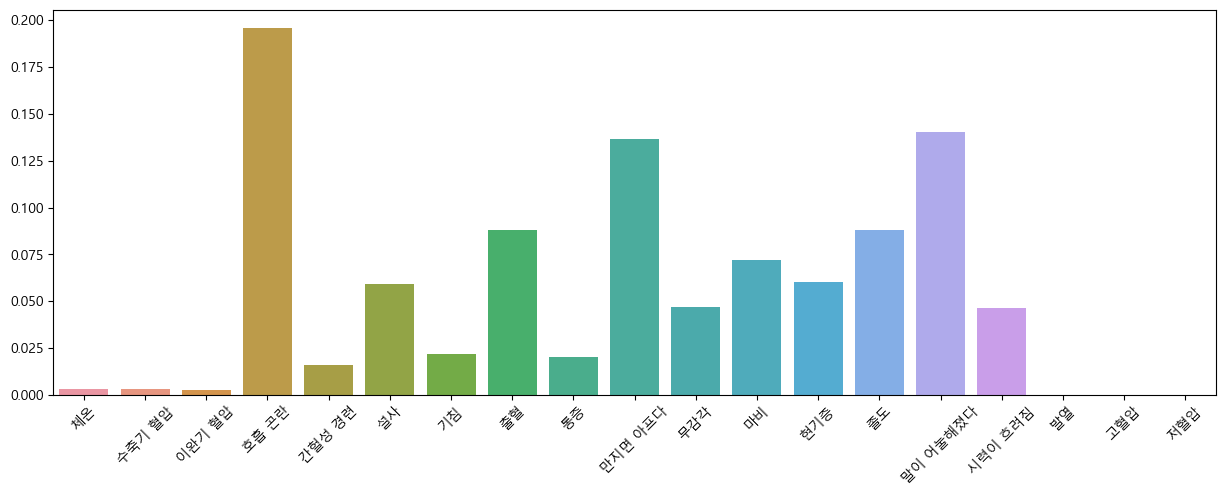

In [38]:
print(list(X))
print(xgb.feature_importances_)
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x = list(X), y=xgb.feature_importances_)
plt.xticks(rotation = 45)
plt.show()

## 미션#3 Clear
## 수고하셨습니다!!